In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
df = pd.read_csv(r'C:\Users\DNC-PC-138\Desktop\Alura\Mercado Financeiro\cotacao.csv')

In [46]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechado,Média,Variação,Volume,Quantidade de Ações,Negócios
0,4/20/2020,29.00,29.49,28.52,28.99,28.90,-1.99,513772288,17775000,46274
1,4/17/2020,29.55,30.06,29.03,29.58,29.55,2.70,550212800,18615000,49085
2,4/16/2020,30.10,30.38,28.80,28.80,29.27,-2.86,606974464,20734200,53466
3,4/15/2020,29.48,30.24,29.00,29.65,29.66,-1.85,496899584,16748200,47711
4,4/14/2020,30.94,31.65,30.00,30.21,30.98,-0.09,550571584,17769700,57626


In [47]:
df.describe()

,Abertura,Máxima,Mínima,Fechado,Média,Variação,Volume,Quantidade de Ações,Negócios
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03,1.247000e+03,1247.000000
mean,32.813729,33.304186,32.271508,32.775213,32.784451,0.070642,3.495313e+08,1.037519e+07,23828.105854
std,11.667518,11.747475,11.549893,11.654706,11.644303,3.004672,2.391771e+08,5.548338e+06,12110.468396
min,12.620000,12.840000,12.520000,12.700000,12.640000,-21.170000,3.812616e+07,1.404900e+06,3252.000000
25%,23.305000,23.615000,22.760000,23.210000,23.240000,-1.500000,1.735824e+08,6.786550e+06,16264.500000
50%,31.160000,31.610000,30.670000,31.150000,31.190000,0.020000,2.870877e+08,9.134300e+06,20886.000000
75%,43.955000,44.375000,43.095000,43.800000,43.760000,1.565000,4.628003e+08,1.224750e+07,28251.500000
max,55.600000,55.910000,54.820000,55.180000,55.250000,17.120000,2.170666e+09,4.711660e+07,101104.000000


In [48]:
df.corr().round(2)

C:\Users\DNC-PC-138\AppData\Local\Temp\ipykernel_21624\1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,Abertura,Máxima,Mínima,Fechado,Média,Variação,Volume,Quantidade de Ações,Negócios
Abertura,1.00,1.00,1.00,1.00,1.00,-0.02,0.63,0.15,0.22
Máxima,1.00,1.00,1.00,1.00,1.00,0.00,0.64,0.16,0.24
Mínima,1.00,1.00,1.00,1.00,1.00,0.01,0.62,0.13,0.21
Fechado,1.00,1.00,1.00,1.00,1.00,0.03,0.63,0.15,0.22
Média,1.00,1.00,1.00,1.00,1.00,0.01,0.63,0.14,0.22
Variação,-0.02,0.00,0.01,0.03,0.01,1.00,0.05,0.06,0.00
Volume,0.63,0.64,0.62,0.63,0.63,0.05,1.00,0.82,0.78
Quantidade de Ações,0.15,0.16,0.13,0.15,0.14,0.06,0.82,1.00,0.89
Negócios,0.22,0.24,0.21,0.22,0.22,0.00,0.78,0.89,1.00


In [49]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

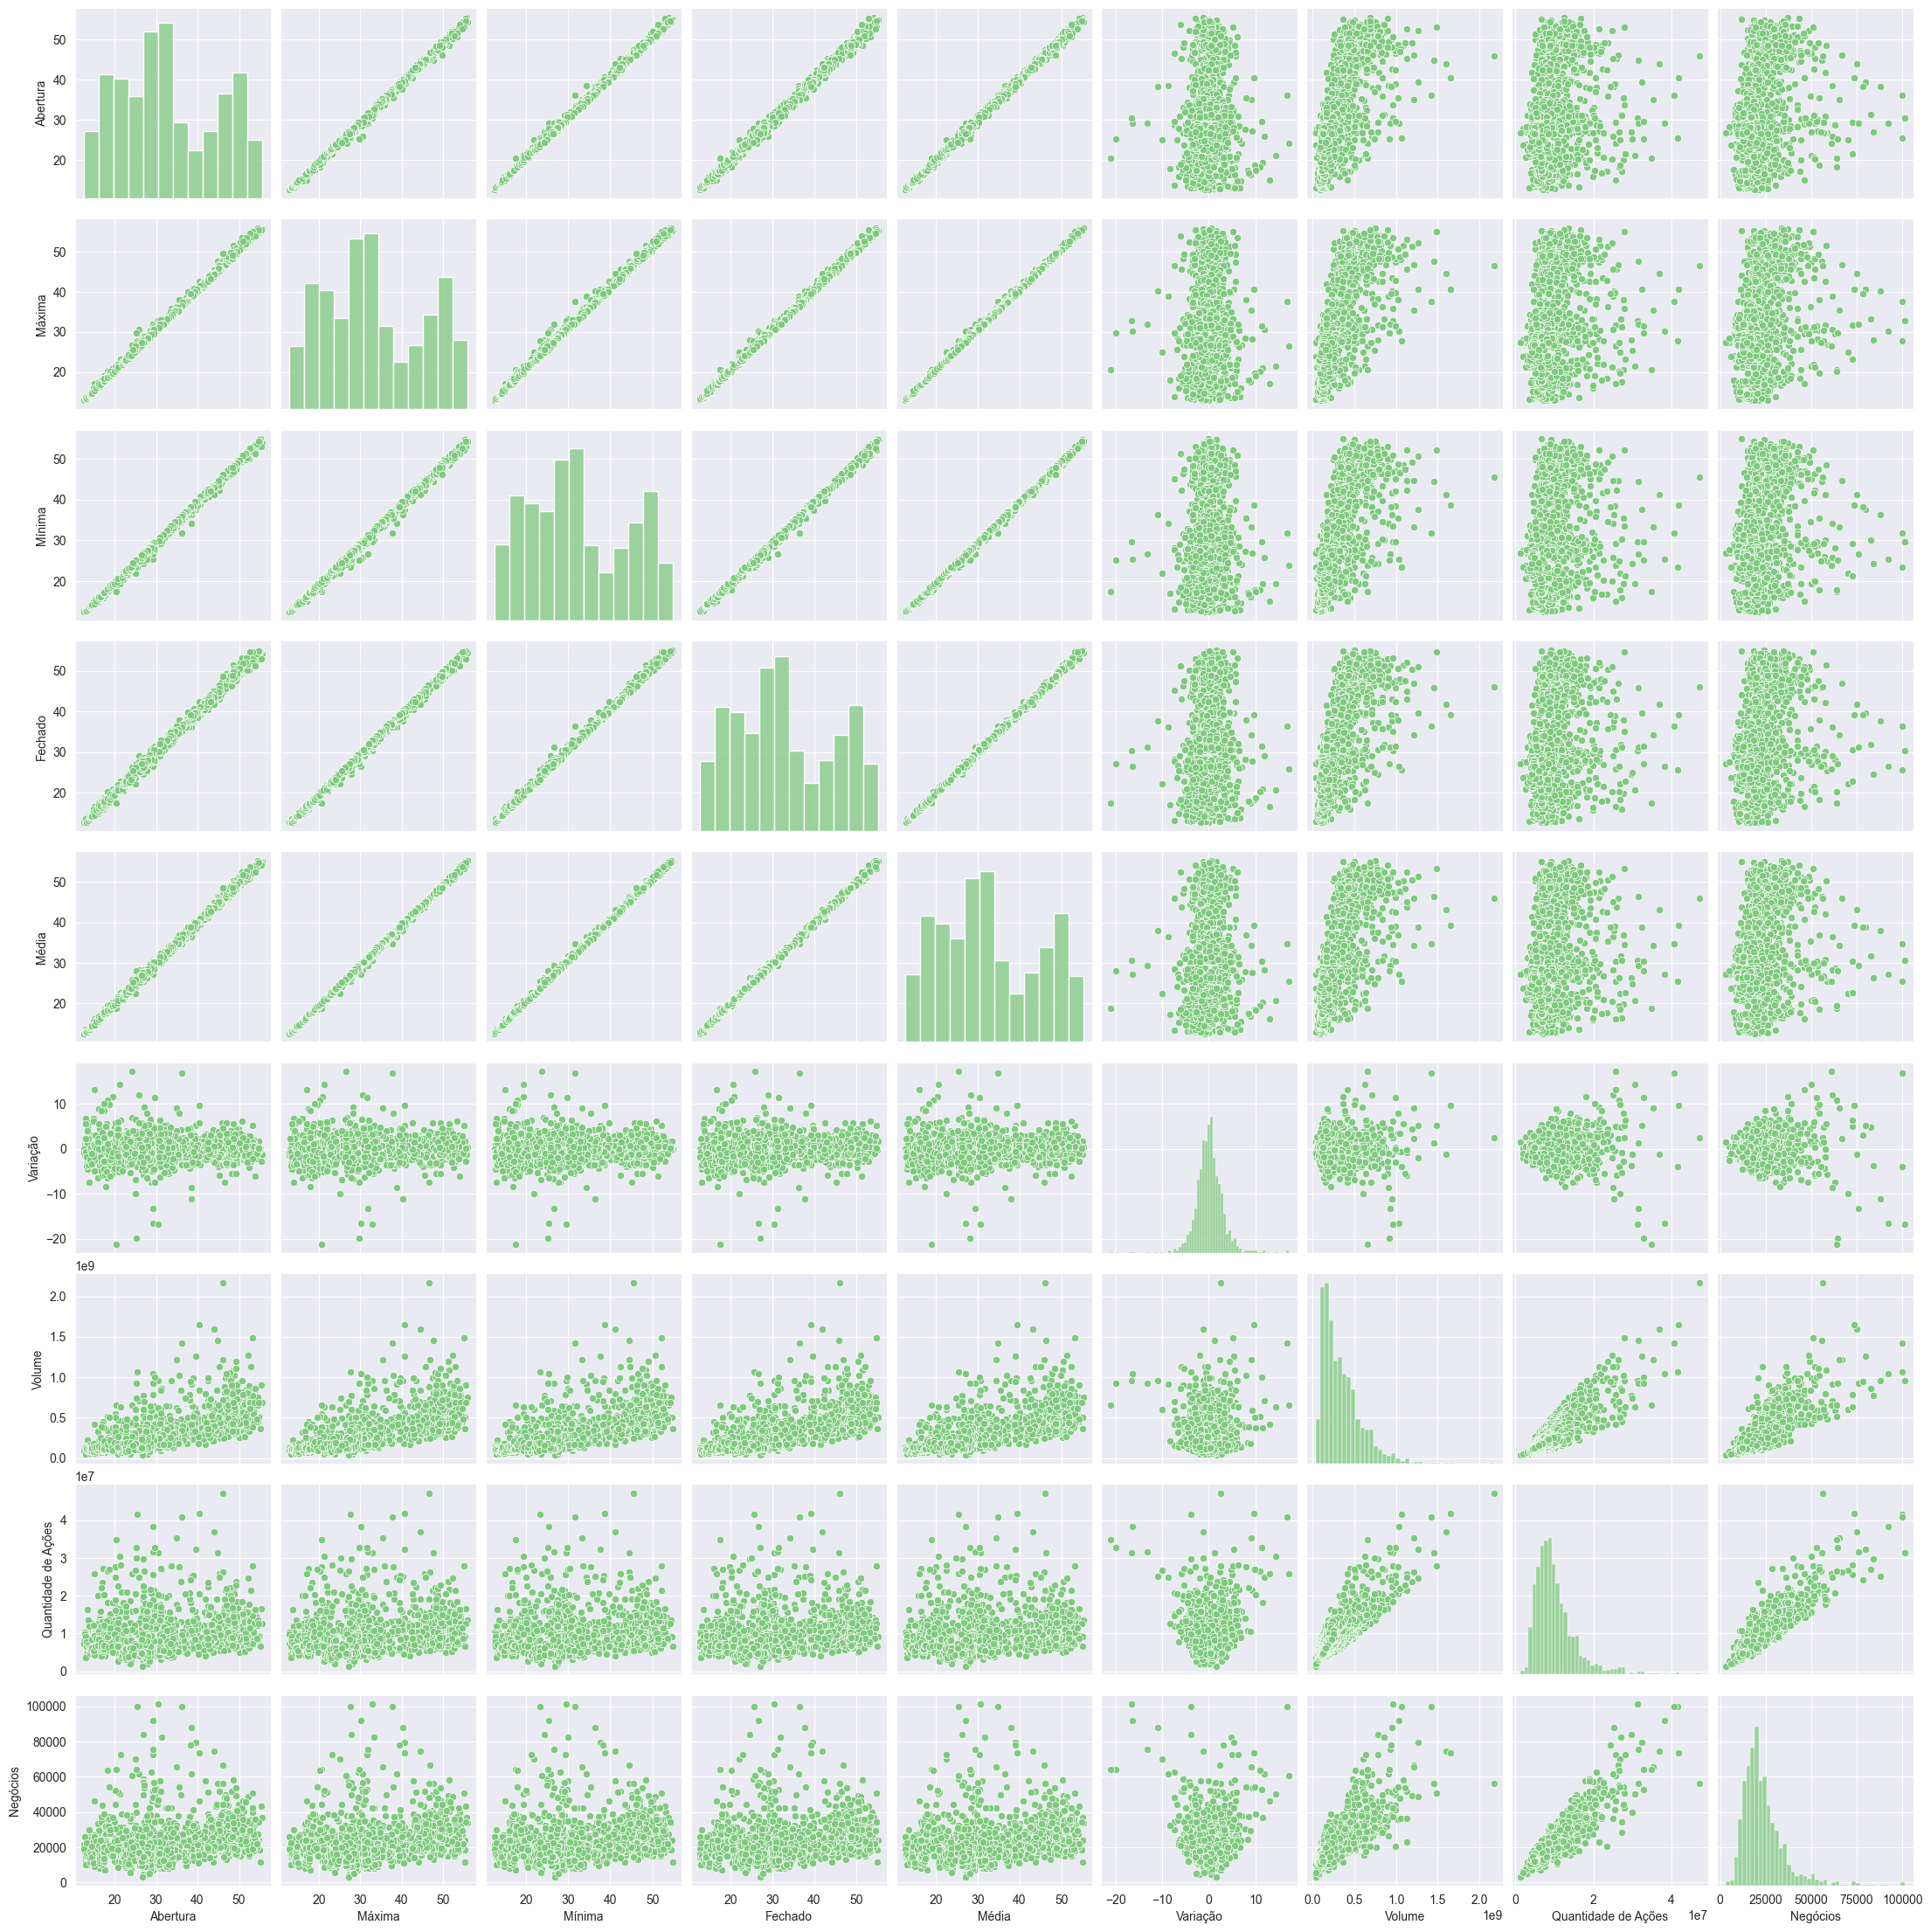

In [50]:
ax = sns.pairplot(df)

Text(0.5, 1.05, 'Dispersão entre Variáveis')

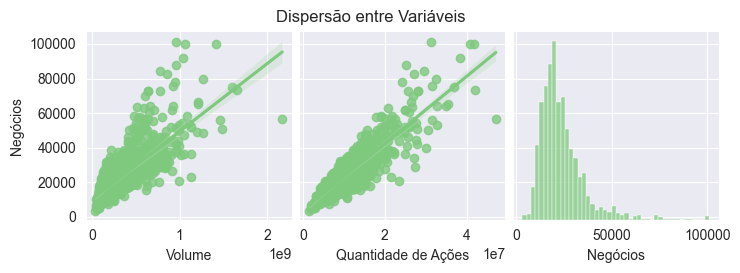

In [51]:
ax = sns.pairplot(df, y_vars='Negócios', x_vars=['Volume', 'Quantidade de Ações', 'Negócios'], kind='reg')
ax.fig.suptitle("Dispersão entre Variáveis", y = 1.05)

In [52]:
df.Data = pd.to_datetime(df.Data)

In [53]:
df['month'] = df['Data'].dt.month

In [54]:
df['year'] = df['Data'].dt.year

In [55]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechado,Média,Variação,Volume,Quantidade de Ações,Negócios,month,year
0,2020-04-20,29.00,29.49,28.52,28.99,28.90,-1.99,513772288,17775000,46274,4,2020
1,2020-04-17,29.55,30.06,29.03,29.58,29.55,2.70,550212800,18615000,49085,4,2020
2,2020-04-16,30.10,30.38,28.80,28.80,29.27,-2.86,606974464,20734200,53466,4,2020
3,2020-04-15,29.48,30.24,29.00,29.65,29.66,-1.85,496899584,16748200,47711,4,2020
4,2020-04-14,30.94,31.65,30.00,30.21,30.98,-0.09,550571584,17769700,57626,4,2020


<AxesSubplot: xlabel='year', ylabel='Abertura'>

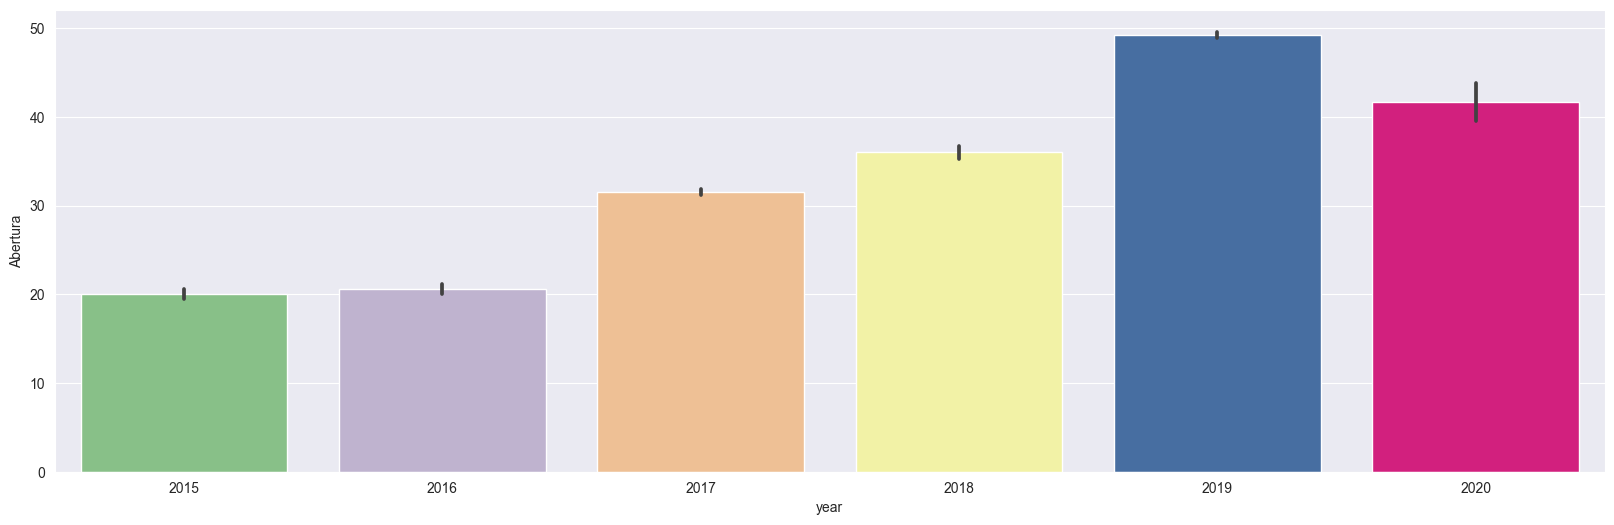

In [56]:
#Aqui conseguimos verificar o aumento entre os anos em relação a abertura. 
#A abertura nada mais é do que o preço no momento em que o mercado é aberto.

plt.subplots(figsize = (20,6))
sns.barplot(data = df, x = 'year', y= 'Abertura')

<AxesSubplot: xlabel='Data', ylabel='Abertura'>

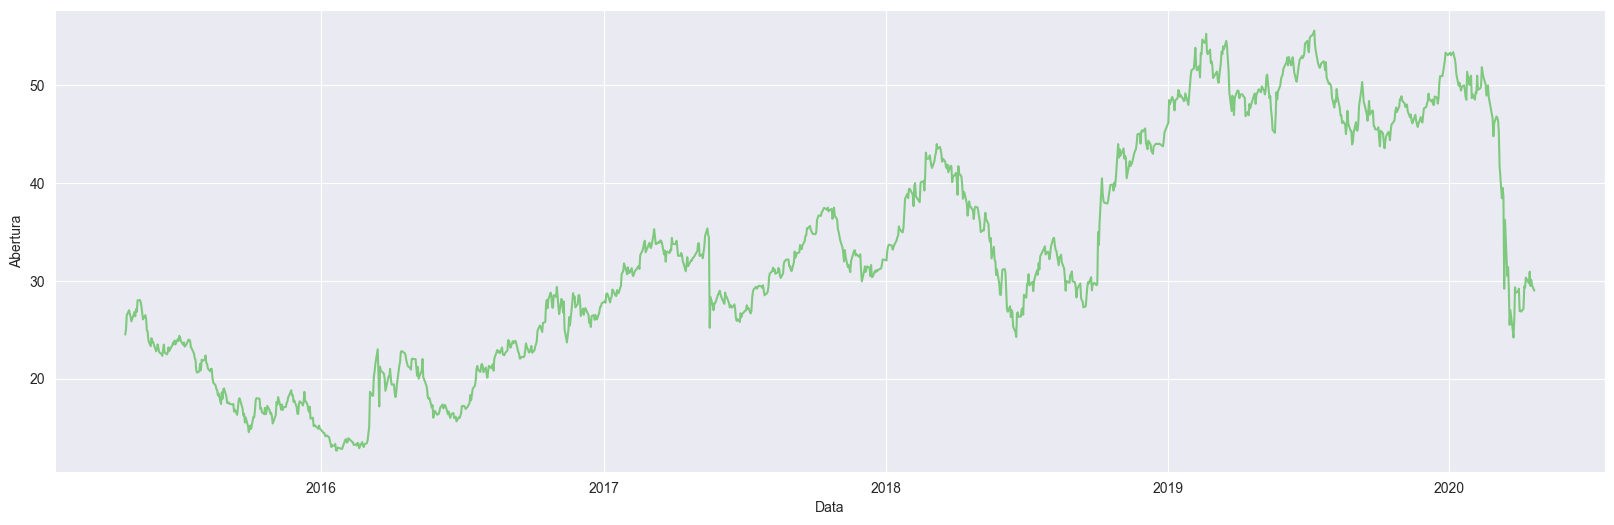

In [57]:
#Percebemos aqui um grande aumento em 2019 e uma queda brusca em 2020, que pode ter sido causada pelo COVID-19

plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Abertura')

<AxesSubplot: xlabel='Data', ylabel='Abertura'>

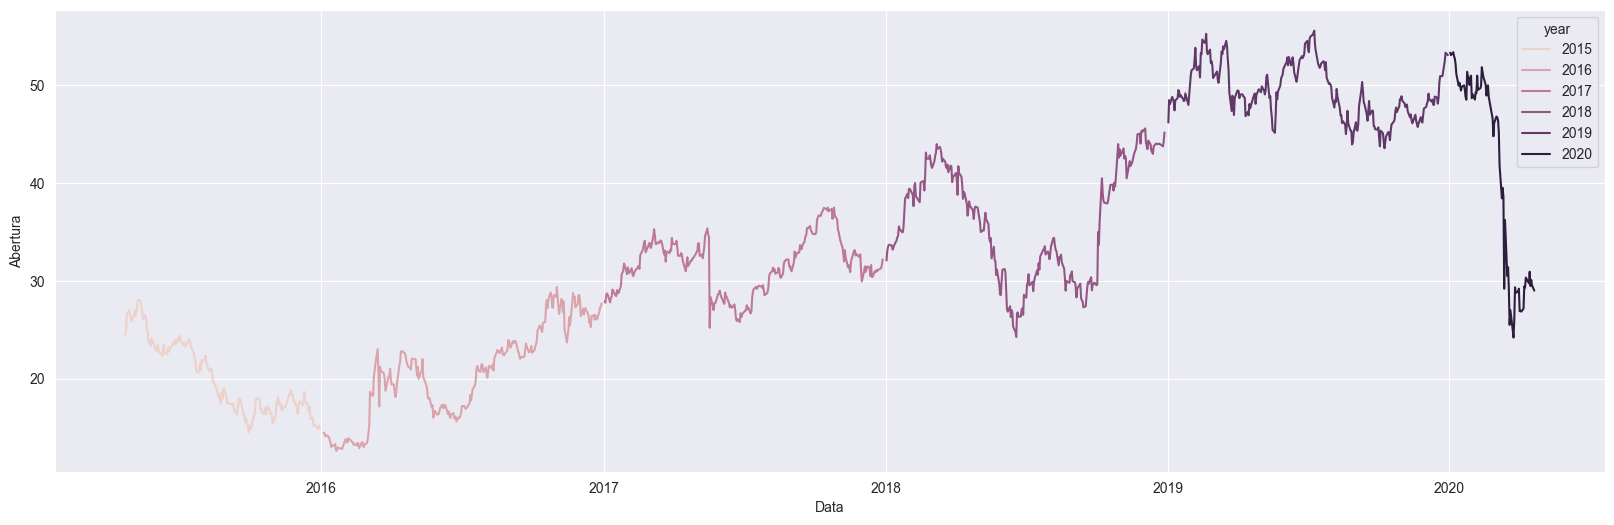

In [58]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Abertura', hue="year")

In [59]:
df_maxmin = df[['Data', 'Máxima', 'Mínima']]

<AxesSubplot: >

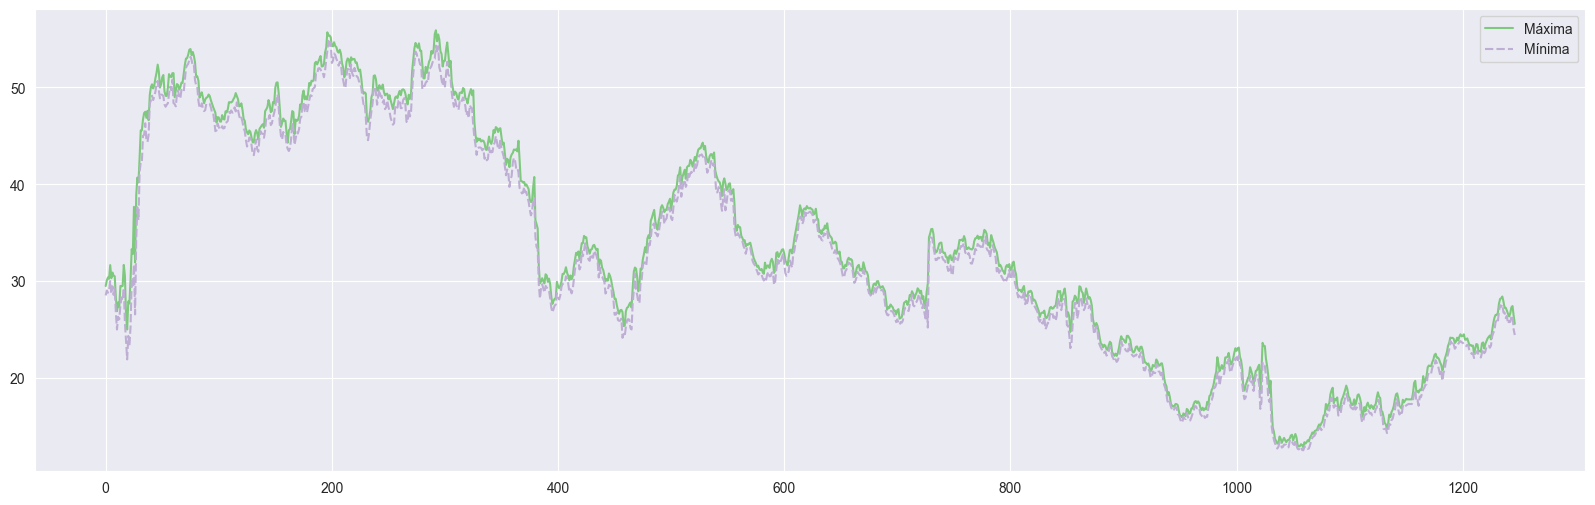

In [60]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df_maxmin)

In [61]:
df['max_min'] = df['Máxima'] - df['Mínima']

<AxesSubplot: xlabel='Data', ylabel='max_min'>

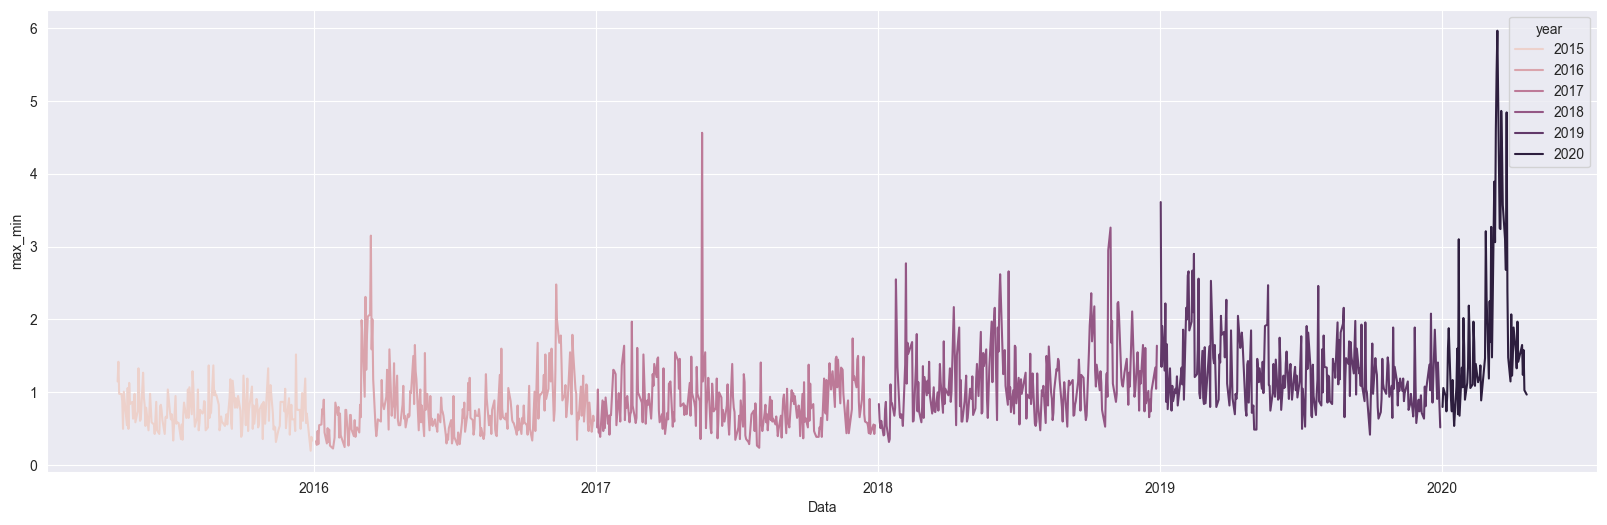

In [62]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'max_min', hue="year")

In [63]:
df = df.rename(columns={'Quantidade de Ações': 'acoes'})

In [64]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechado,Média,Variação,Volume,acoes,Negócios,month,year,max_min
0,2020-04-20,29.00,29.49,28.52,28.99,28.90,-1.99,513772288,17775000,46274,4,2020,0.97
1,2020-04-17,29.55,30.06,29.03,29.58,29.55,2.70,550212800,18615000,49085,4,2020,1.03
2,2020-04-16,30.10,30.38,28.80,28.80,29.27,-2.86,606974464,20734200,53466,4,2020,1.58
3,2020-04-15,29.48,30.24,29.00,29.65,29.66,-1.85,496899584,16748200,47711,4,2020,1.24
4,2020-04-14,30.94,31.65,30.00,30.21,30.98,-0.09,550571584,17769700,57626,4,2020,1.65


<AxesSubplot: xlabel='Data', ylabel='Média'>

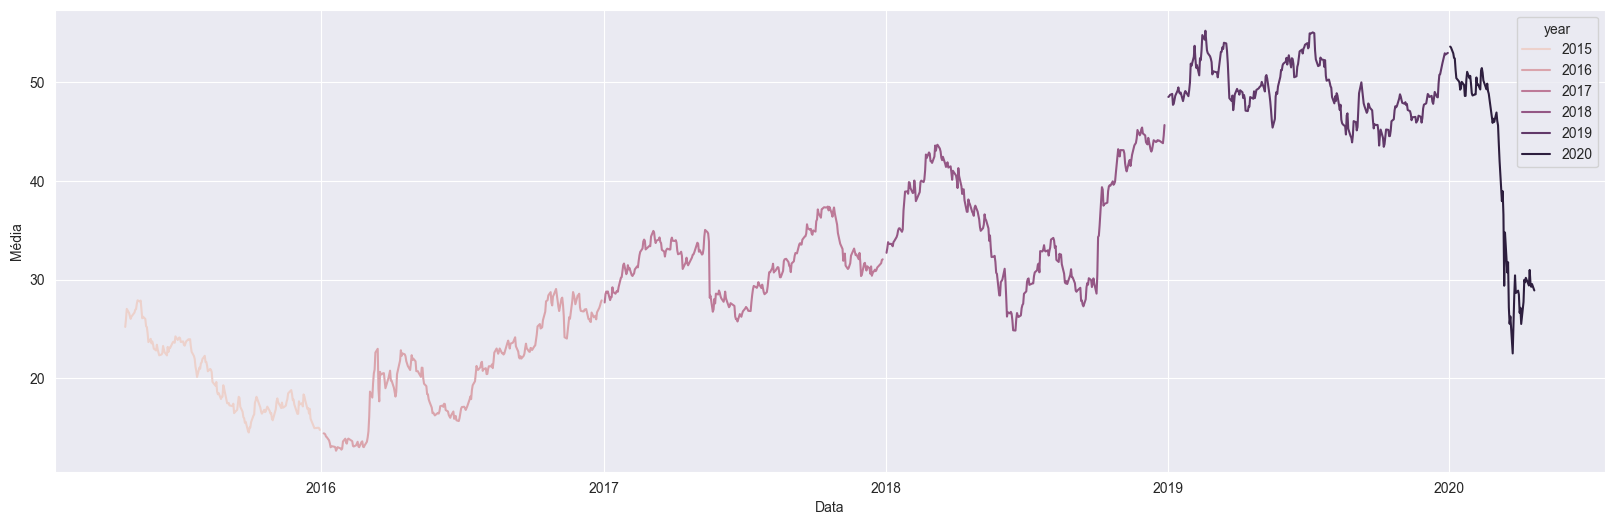

In [65]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Média', hue="year")

<AxesSubplot: xlabel='Data', ylabel='Variação'>

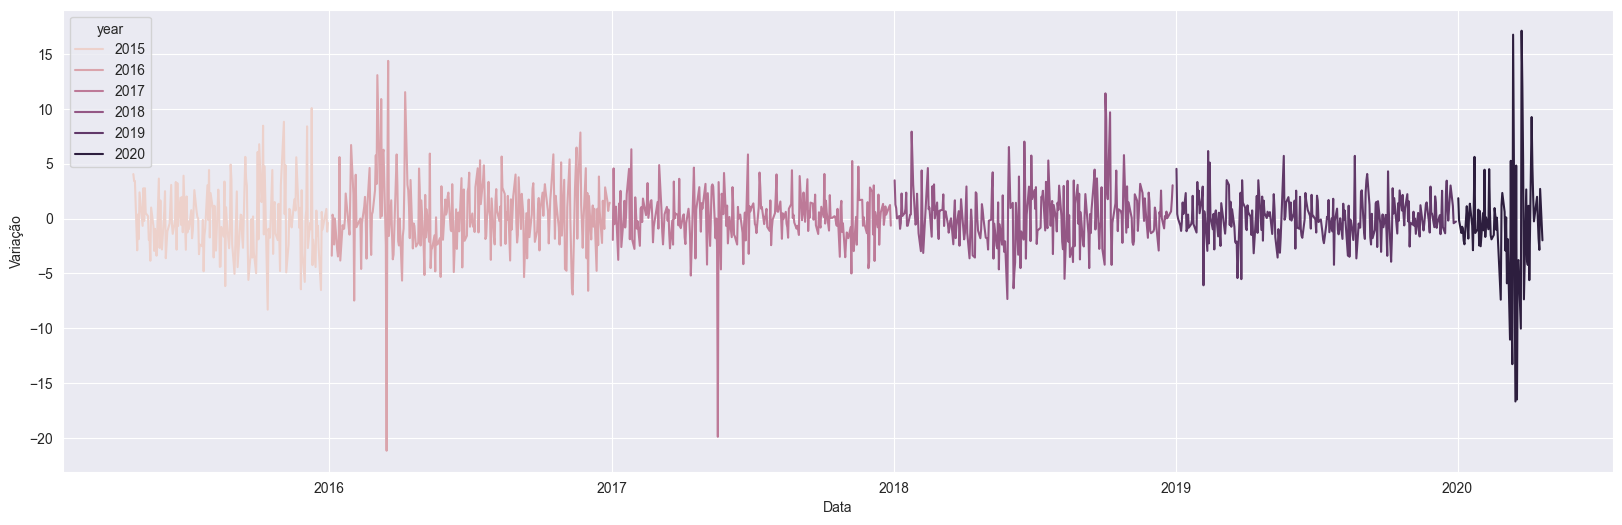

In [66]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Variação', hue="year")

<AxesSubplot: xlabel='Data', ylabel='Volume'>

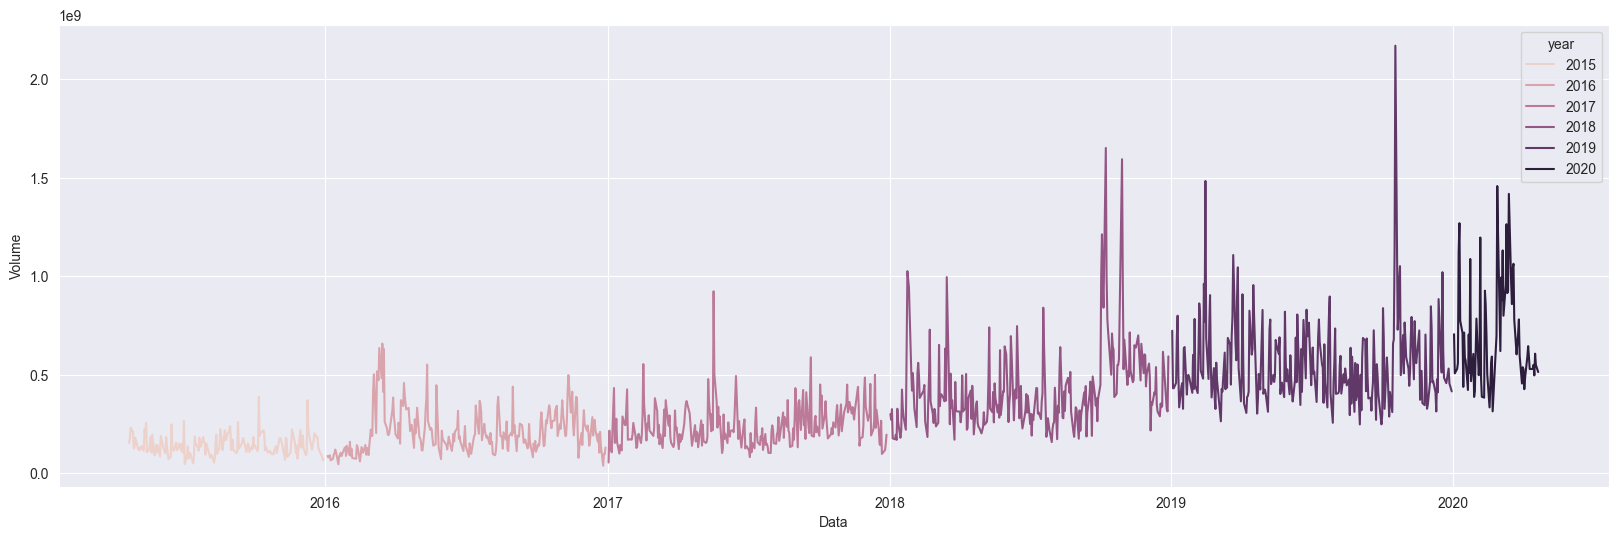

In [67]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Volume', hue="year")

<AxesSubplot: xlabel='Data', ylabel='acoes'>

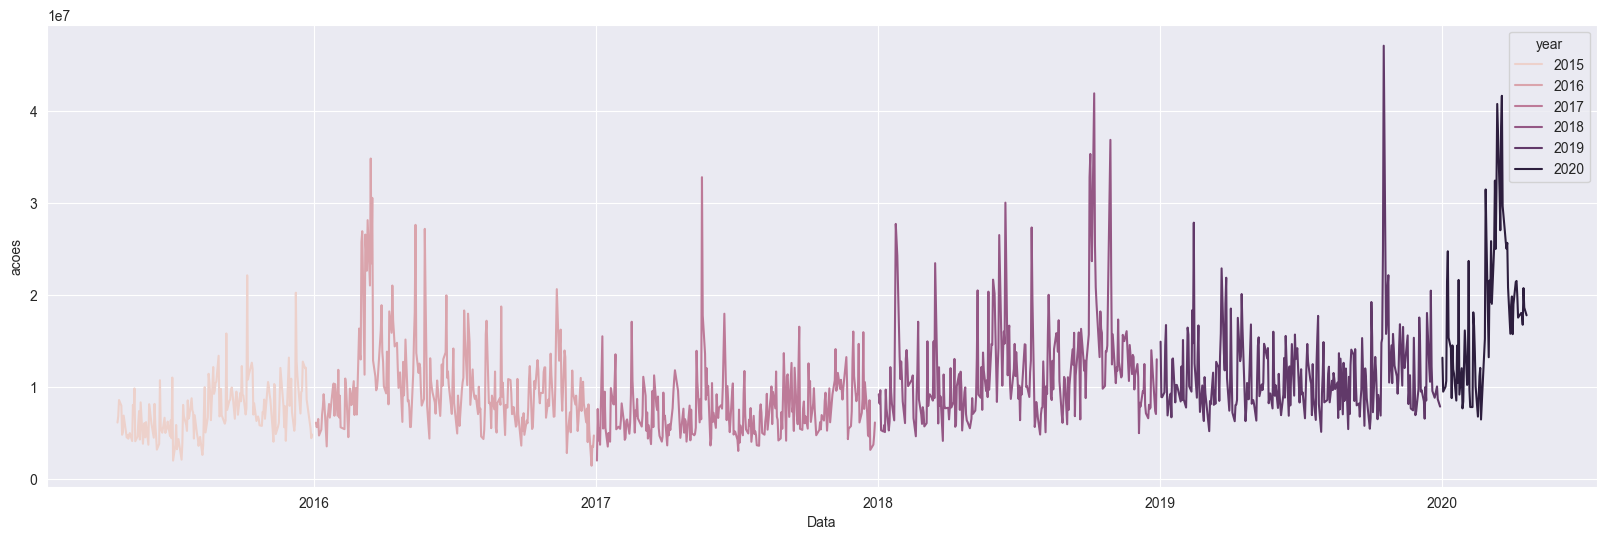

In [69]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'acoes', hue="year")

<AxesSubplot: xlabel='Data', ylabel='Negócios'>

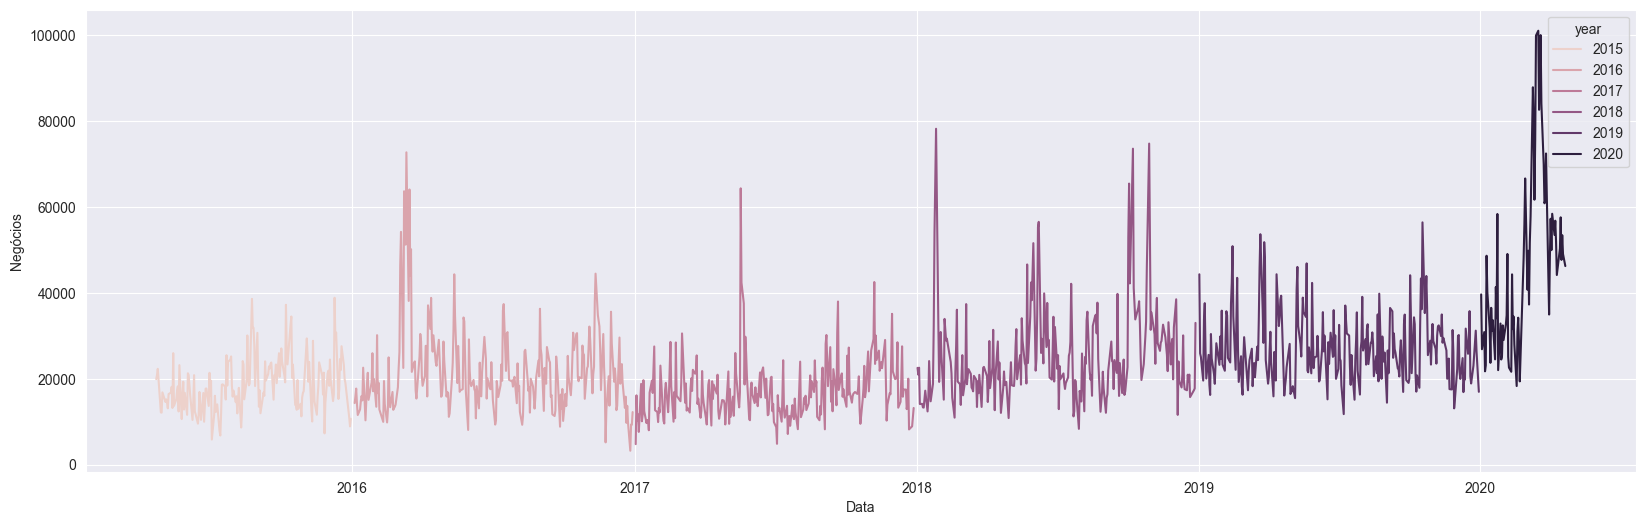

In [ ]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Negócios', hue="year")

<AxesSubplot: xlabel='Data', ylabel='Fechado'>

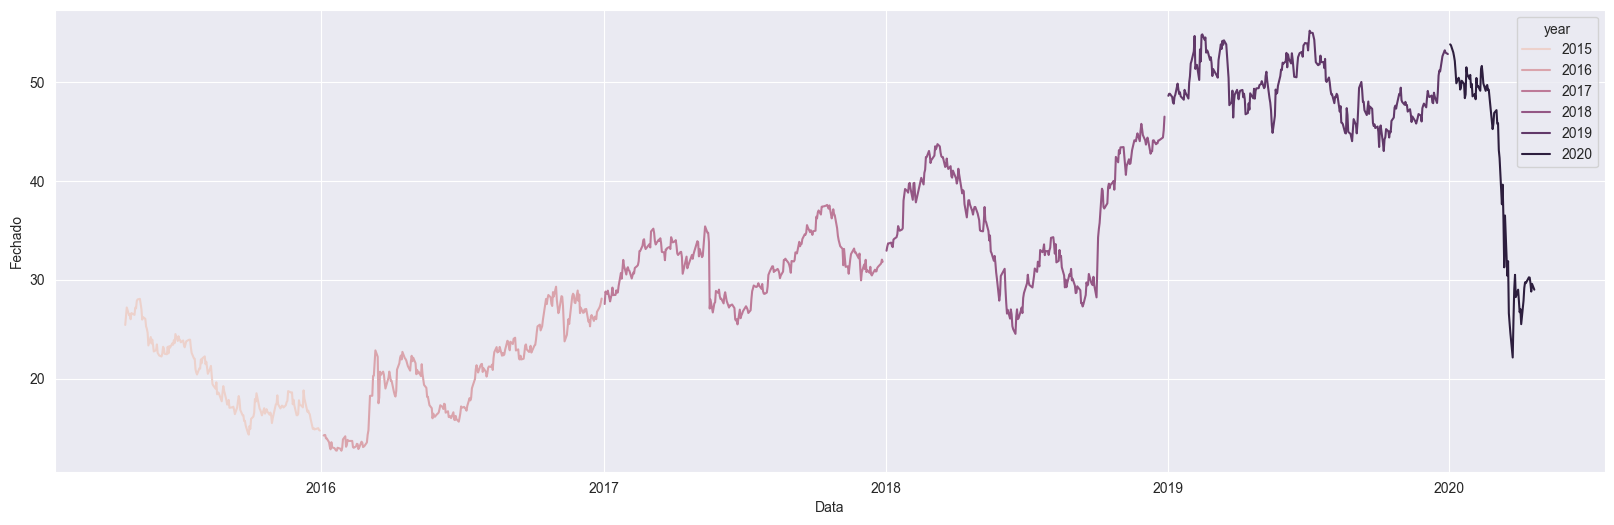

In [70]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Fechado', hue="year")

In [71]:
y = df['Negócios']

In [73]:
X = df[['Volume', 'acoes']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10000)

In [75]:
modelo = LinearRegression()

In [76]:
modelo.fit(X_train, y_train)

LinearRegression()

In [77]:
print("R^2 = {}".format(modelo.score(X_train, y_train).round(2)))

R^2 = 0.78


In [78]:
y_previsto = modelo.predict(X_test)

In [79]:
print('R^2 = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R^2 = 0.837


In [90]:
Volume = 2000000000
acoes = 1000000
entrada = [[Volume,acoes]]
modelo.predict(entrada)[0]

c:\Users\DNC-PC-138\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21379.196572991113

In [89]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechado,Média,Variação,Volume,acoes,Negócios,month,year,max_min
0,2020-04-20,29.00,29.49,28.52,28.99,28.90,-1.99,513772288,17775000,46274,4,2020,0.97
1,2020-04-17,29.55,30.06,29.03,29.58,29.55,2.70,550212800,18615000,49085,4,2020,1.03
2,2020-04-16,30.10,30.38,28.80,28.80,29.27,-2.86,606974464,20734200,53466,4,2020,1.58
3,2020-04-15,29.48,30.24,29.00,29.65,29.66,-1.85,496899584,16748200,47711,4,2020,1.24
4,2020-04-14,30.94,31.65,30.00,30.21,30.98,-0.09,550571584,17769700,57626,4,2020,1.65


<AxesSubplot: xlabel='Data', ylabel='Volume'>

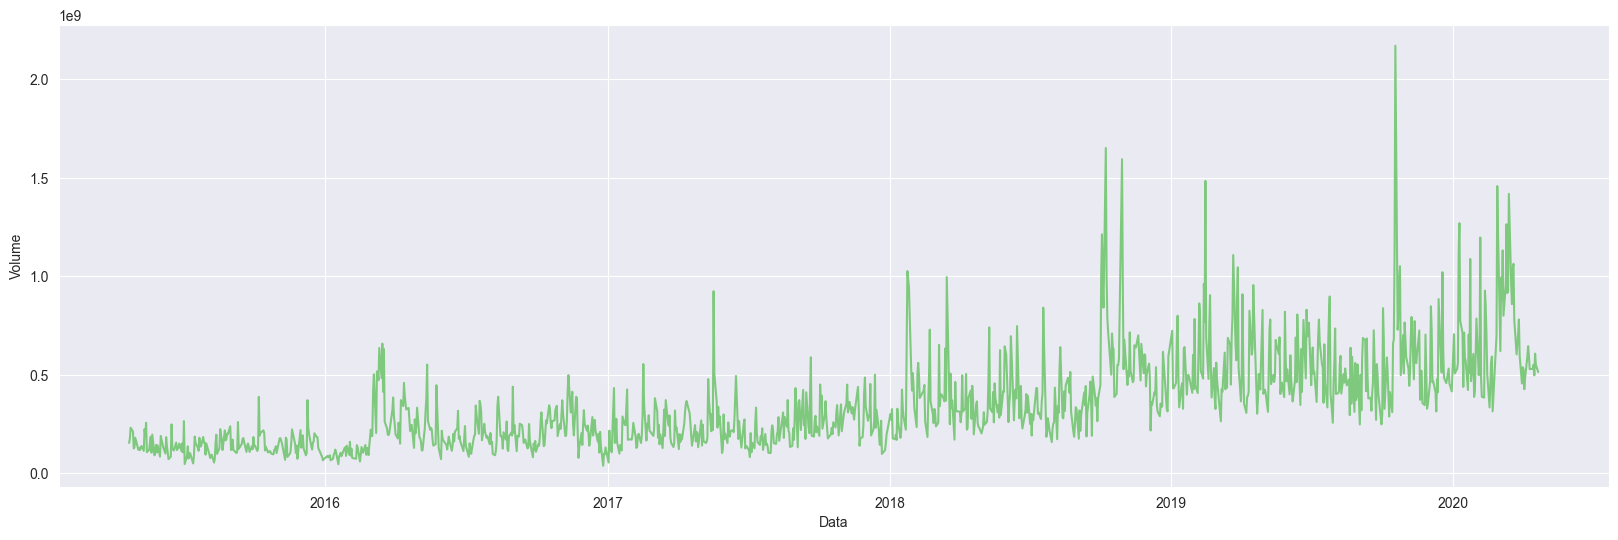

In [88]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Volume')

<AxesSubplot: xlabel='Data', ylabel='acoes'>

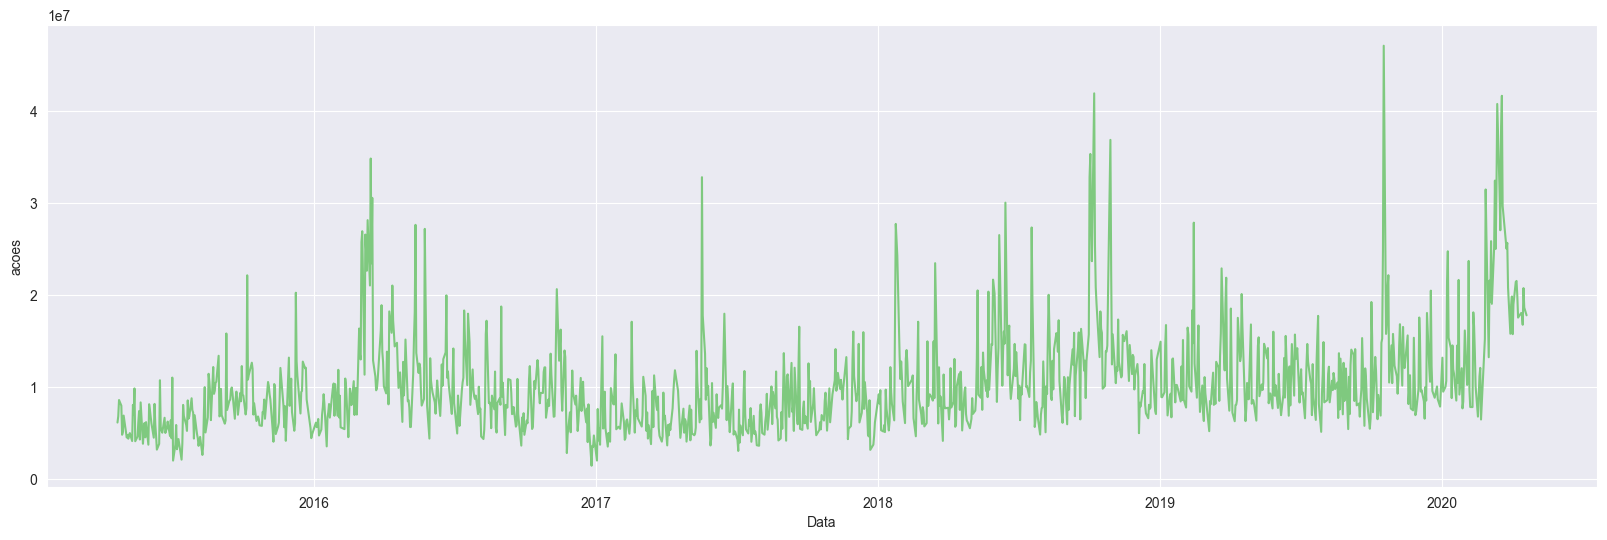

In [87]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'acoes')

<AxesSubplot: xlabel='Data', ylabel='Negócios'>

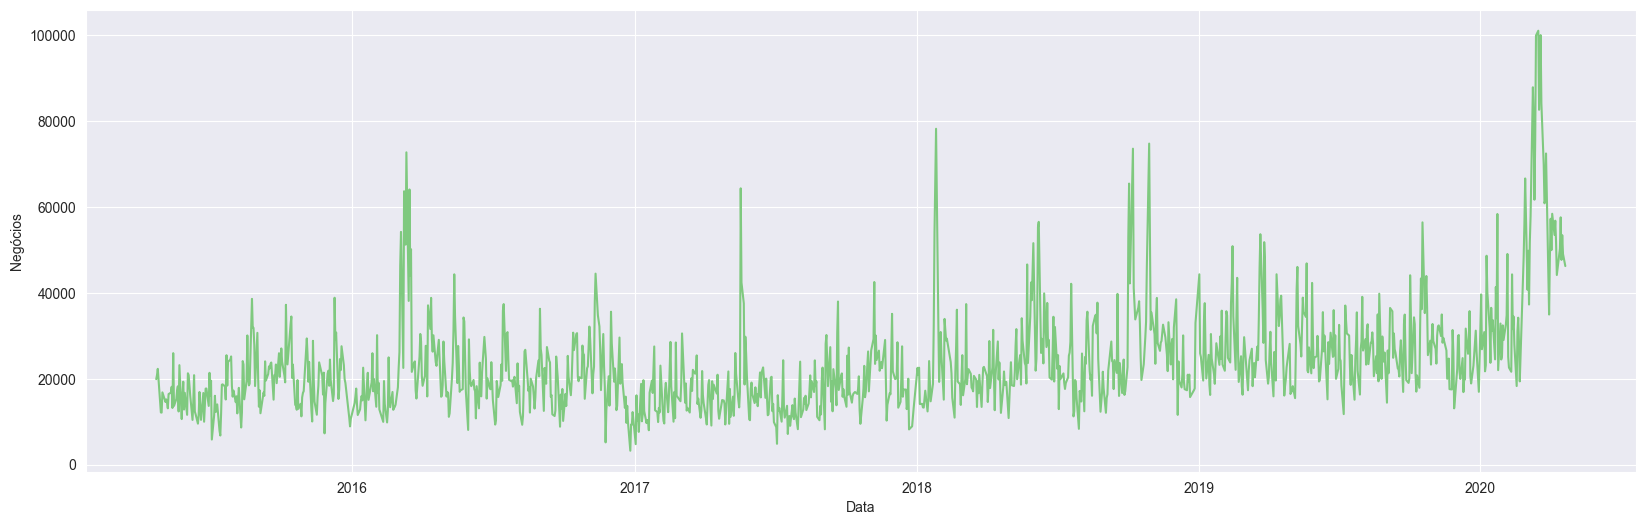

In [91]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'Data', y= 'Negócios')